In [15]:
include("model.jl")
include("Parser.jl")
include("greedy.jl")
include("utils.jl")
using JuMP

## Data processing

In [16]:
n, m, x_VC, y_VC, x_loc, y_loc, Q, C, q, f, p, tc, B, R, localities_with_high_priorities, M = parse_instance("./Instances/coord20-5-2_processed.dat")

(20, 5, [6.0, 10.0, 47.0, 18.0, 31.0], [21.0, 1.0, 15.0, 25.0, 42.0], [9.0, 22.0, 8.0, 2.0, 20.0, 2.0, 25.0, 20.0, 15.0, 4.0, 29.0, 34.0, 27.0, 46.0, 33.0, 28.0, 44.0, 33.0, 35.0, 40.0], [22.0, 5.0, 17.0, 22.0, 29.0, 24.0, 15.0, 24.0, 2.0, 18.0, 47.0, 25.0, 39.0, 33.0, 29.0, 46.0, 28.0, 32.0, 23.0, 39.0], 70, [70, 140, 70, 140, 140], [20, 11, 18, 13, 12, 17, 19, 13, 18, 14, 12, 15, 15, 20, 13, 14, 17, 19, 14, 16], [9576, 8149, 14050, 8004, 6616], 1000, 0, 10769.655012070602, [11.579684512642148, 13.40113471167733, 9.764853467462618, 8.065311473886684, 11.424395537122809], [17, 2, 4], 5)

In [17]:
println("Budget: ", B)

Budget: 10769.655012070602


In [18]:
# Create the distance matrix
distance_matrix = zeros(Float64, m, n)

for i in 1:m 
    for j in 1:n
        distance_matrix[i, j] = sqrt((x_VC[i] - x_loc[j])^2 + (y_VC[i] - y_loc[j])^2)
    end
end


# Create reachability matrix a
A = zeros(Int, m, n)


for i in 1:m
    for j in 1:n
        if distance_matrix[i, j] <= R[i]
            A[i, j] = 1
        end
    end
end

In [19]:
D = zeros(Float64, n+m, n+m)
#The n first rows/cols of D relate to the localities, the m last to the VC
#In other words, calling D[i,j] for i in I, j in J corresponds to call D[i+n,j]
for i in 1:m+n
    for j in 1:m+n
        if i <= n && j <= n
            # Both indices in `loc`
            D[i, j] = sqrt((x_loc[i] - x_loc[j])^2 + (y_loc[i] - y_loc[j])^2)
        elseif i > n && j > n
            # Both indices in `VC`
            D[i, j] = sqrt((x_VC[i - n] - x_VC[j - n])^2 + (y_VC[i - n] - y_VC[j - n])^2)
        elseif i > n && j <= n
            # i in `VC`, j in `loc`
            D[i, j] = sqrt((x_VC[i - n] - x_loc[j])^2 + (y_VC[i - n] - y_loc[j])^2)
        else
            # i in `loc`, j in `VC`
            D[i, j] = sqrt((x_loc[i] - x_VC[j - n])^2 + (y_loc[i] - y_VC[j - n])^2)
        end
    end
end

## Greedy Algorithm

In [20]:
MMTs, Budget, Q_MMTs, Q_tot = greedy_OptVax(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)

([[(25, 25), (25, 17), (17, 2), (2, 4), (4, 6), (6, 5)], [(25, 25), (25, 1), (1, 3), (3, 10), (10, 9)]], 8645.732137494637, [70, 70], 140)

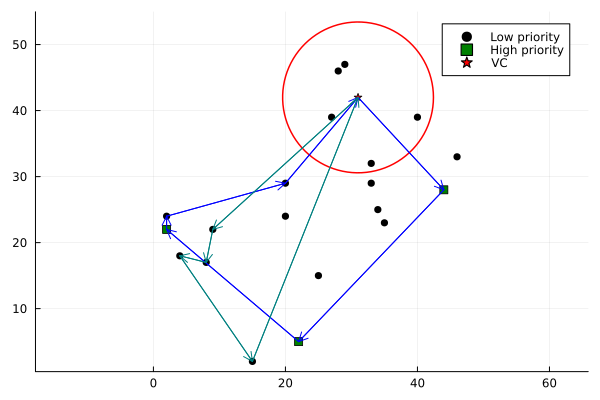

In [21]:
plot_solution_greedy(MMTs, x_VC, y_VC, x_loc, y_loc, R, n, m, M, localities_with_high_priorities)

## Models Creation

### OptVax1

In [ ]:
# model_OptVax1 = solve_OptVax1(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)

# obj_val = objective_value(model_OptVax1)
# println("Objective Value: ", obj_val)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+04]
  Cost   [1e+01, 8e+01]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+04]
Presolving model
5135 rows, 3046 cols, 25067 nonzeros  0s
4675 rows, 2606 cols, 21780 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   4675 rows
   2606 cols (2586 binary, 20 integer, 0 implied int., 0 continuous)
   21780 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   442             -inf                 inf        0      0      0         0     0.2s
         0       0         0   0.00%   216             -inf                 inf        0      0     54       231     0.2s
 L       0       0         0   0.0

### OptVax2

In [23]:
# model_OptVax2 = solve_OptVax2(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)
# obj_val = objective_value(model_OptVax2)
# println("Objective Value: ", obj_val)

### OptVax2LP

In [24]:
# model_OptVax2LP = solve_OptVax2LP(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)
# obj_val = objective_value(model_OptVax2LP)
# println("Objective Value: ", obj_val)

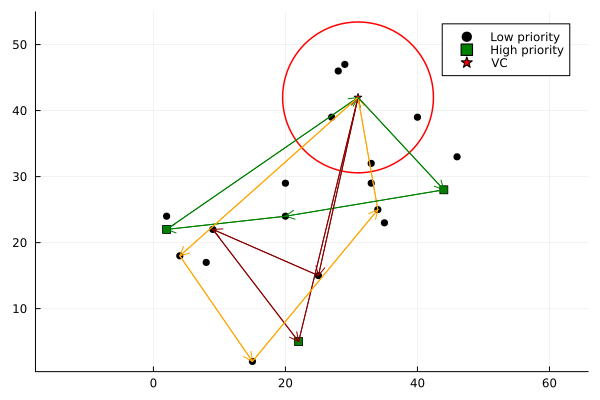

In [ ]:
# plot_solution(model_OptVax1, x_VC, y_VC, x_loc, y_loc, R,n,m,M, localities_with_high_priorities)